# PREPROCESSING

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

 ## DATASET
 CIFAR-10: computer-vision dataset used for object recognition

In [2]:
#Getting the training and testing data, already validated btw training and testing
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

#Scaling the data (using 'divide by maximum')
training_images, testing_images = training_images/255, testing_images/255

170498071/170498071 [==============================] - 11s 0us/step


In [4]:
class_names = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
#Declaring the different image names in the dataset
#The way they are declared is done by taki8ng the dataset into account so we really cant change their positions

## PREPARING DATA

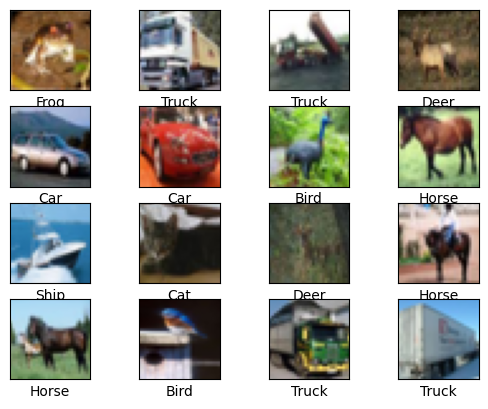

In [6]:
#Displaying the first 16 images to get to know the datasets/input features
for i in range(16):
  plt.subplot(4,4,i+1)     #making a 4x4 grid to show the images
  plt.xticks([])
  plt.yticks([])
  plt.imshow(training_images[i], cmap=plt.cm.binary)   
  plt.xlabel(class_names[training_labels[i][0]])
  #plotting the name of the images as xlabel

plt.show()

# TRAINING MODEL

## STEP-1
Defining the Model

In [8]:
model = models.Sequential()
#A Convolutional layer filters out the features of the images (eg. horse has long legs, cat has pointy ears)
#A Maxpooling layer reduces the image to essential information based on convolutional layers output
#This is repeated again twice or thrice
#A Flatten layer just converts the input into a 1D vector so that it can be feeded to a neural network
#A Dense layer is the most basic type of layer in which each neuron recieves input from all the neurons in the prev layer
model.add(layers.Conv2D(32, (3,3), activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

## STEP-2
Choosing loss and cost functions

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## STEP-3
Undergoing Gradient Descent Algorithm

In [10]:
model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

Epoch 1/10
1563/1563 [==============================] - 83s 52ms/step - loss: 1.5630 - accuracy: 0.4305 - val_loss: 1.2918 - val_accuracy: 0.5311
Epoch 2/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.2246 - accuracy: 0.5650 - val_loss: 1.2169 - val_accuracy: 0.5604
Epoch 3/10
1563/1563 [==============================] - 84s 53ms/step - loss: 1.0703 - accuracy: 0.6215 - val_loss: 1.0416 - val_accuracy: 0.6311
Epoch 4/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.9769 - accuracy: 0.6555 - val_loss: 1.0063 - val_accuracy: 0.6521
Epoch 5/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9032 - accuracy: 0.6839 - val_loss: 0.9914 - val_accuracy: 0.6481
Epoch 6/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8435 - accuracy: 0.7072 - val_loss: 0.9061 - val_accuracy: 0.6860
Epoch 7/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.7908 - accuracy: 0.7241 - val_loss: 0.9180 -

# TESTING MODEL

In [12]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss} ")
print(f"Accuracy: {accuracy}")

313/313 [==============================] - 4s 14ms/step - loss: 0.9405 - accuracy: 0.6835
Loss: 0.9405264854431152 
Accuracy: 0.6834999918937683


# TESTING WITH NEW FEATURES

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/Machine Learning/IMAGE CLASSIFIER/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Machine Learning/IMAGE CLASSIFIER


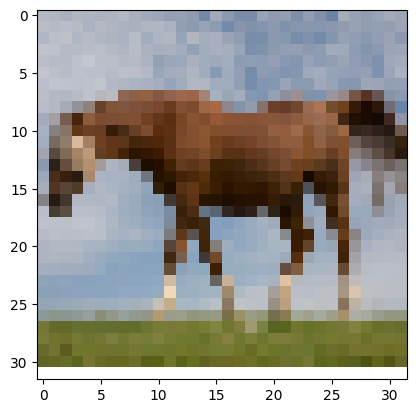

In [15]:
image = cv.imread('Horse.jpg')
#imread function loads the images in BGR color scheme but we are working with RGB color scheme 
#so we will just swap the blue and red colors.
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)   #we made use of convert color for the swapping functionality

plt.imshow(image, cmap=plt.cm.binary)

In [16]:
prediction = model.predict(np.array([image])/255)    #image scaling just like the datasets
index = np.argmax(prediction)   #index of the maximal value i.e. highest actuvation neuron
print(f"Prediction is {class_names[index]}")

1/1 [==============================] - 0s 138ms/step
Prediction is Horse


1/1 [==============================] - 0s 24ms/step
Prediction is Plane


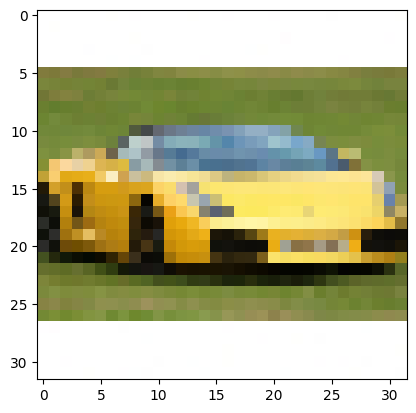

In [18]:
image = cv.imread('Car.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image, cmap=plt.cm.binary)

prediction = model.predict(np.array([image])/255)
index = np.argmax(prediction)
print(f"Prediction is {class_names[index]}")

1/1 [==============================] - 0s 23ms/step
Prediction is Ship


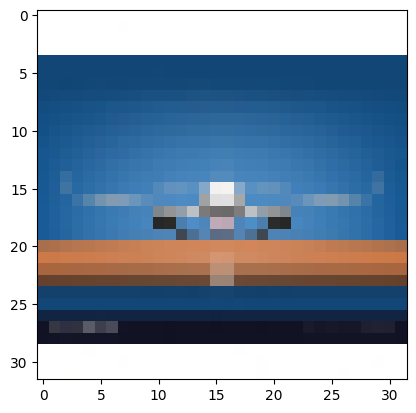

In [19]:
image = cv.imread('Plane.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image, cmap=plt.cm.binary)

prediction = model.predict(np.array([image])/255)
index = np.argmax(prediction)
print(f"Prediction is {class_names[index]}")

1/1 [==============================] - 0s 24ms/step
Prediction is Deer


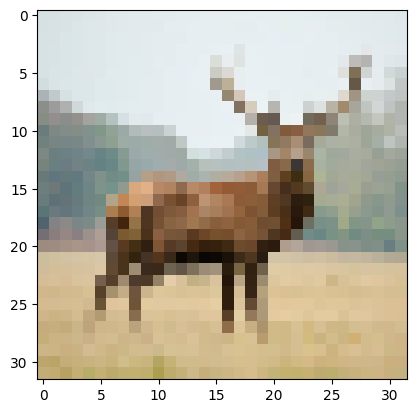

In [20]:
image = cv.imread('Deer.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image, cmap=plt.cm.binary)

prediction = model.predict(np.array([image])/255)
index = np.argmax(prediction)
print(f"Prediction is {class_names[index]}")

1/1 [==============================] - 0s 29ms/step
Prediction is Car


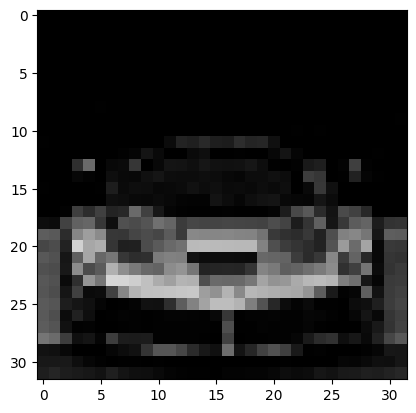

In [23]:
image = cv.imread('Car2.0.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image, cmap=plt.cm.binary)

prediction = model.predict(np.array([image])/255)
index = np.argmax(prediction)
print(f"Prediction is {class_names[index]}")

1/1 [==============================] - 0s 25ms/step
Prediction is Plane


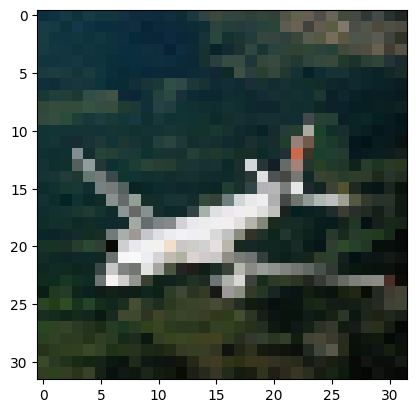

In [25]:
image = cv.imread('Plane2.0.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image, cmap=plt.cm.binary)

prediction = model.predict(np.array([image])/255)
index = np.argmax(prediction)
print(f"Prediction is {class_names[index]}")